In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')
print(df.columns)
df.head(10)

Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041
8,9,"Postjeskade 41 2, Amsterdam",1058 DG,399000.0,49,3,4.854671,52.363471
9,10,"Van Ostadestraat 193 H, Amsterdam",1073 TM,300000.0,33,2,4.897142,52.353111


In [2]:
def get_outcode(x:str):
    return x.split(' ')[0]
df['outcode'] = df.Zip.apply(get_outcode)
df.head(5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,outcode
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,1091
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,1059
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,1097
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,1060
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,1036


In [3]:
print(df.shape)
df.info()

(924, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
 8   outcode     924 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 65.1+ KB


In [4]:
print(df.nunique())
df = df.dropna()

Unnamed: 0    924
Address       919
Zip           834
Price         226
Area          193
Room           13
Lon           894
Lat           886
outcode        70
dtype: int64


In [5]:
num = df[['Area', 'Room', 'Lon', 'Lat', 'Price']]
cat = df[['Zip', 'Address', 'outcode']]

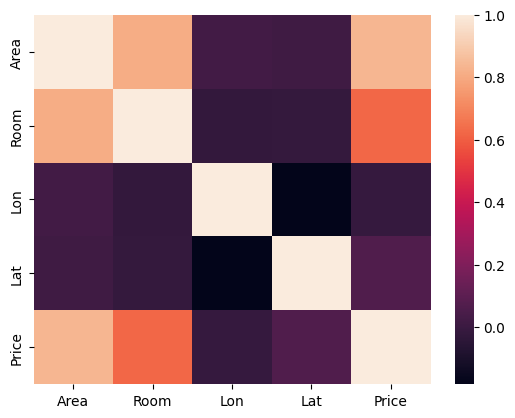

In [6]:
sns.heatmap(num.corr())
plt.show()

In [7]:
print(num.describe())
num = num.drop('Price', axis=1)

             Area       Room         Lon         Lat         Price
count  920.000000  920.00000  920.000000  920.000000  9.200000e+02
mean    95.607609    3.56413    4.888652   52.363271  6.220654e+05
std     56.849699    1.57103    0.053118    0.024054  5.389942e+05
min     21.000000    1.00000    4.644819   52.291519  1.750000e+05
25%     60.000000    3.00000    4.855834   52.351925  3.500000e+05
50%     83.000000    3.00000    4.886818   52.364499  4.670000e+05
75%    113.000000    4.00000    4.922337   52.377545  7.000000e+05
max    623.000000   14.00000    5.029122   52.423805  5.950000e+06


<Figure size 1600x400 with 0 Axes>

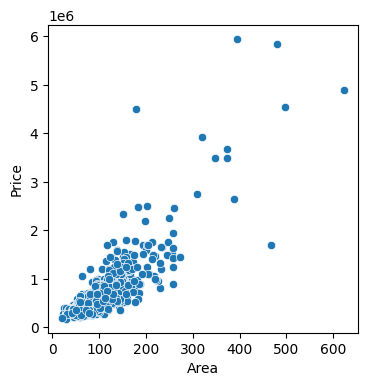

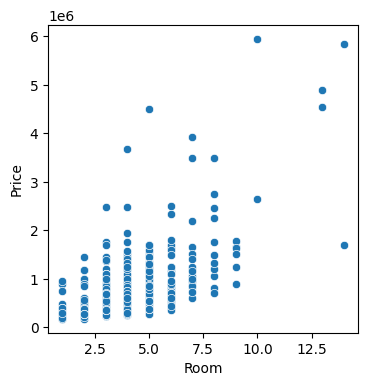

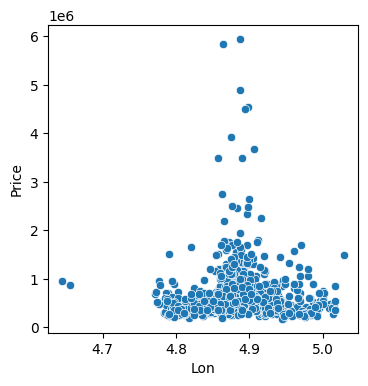

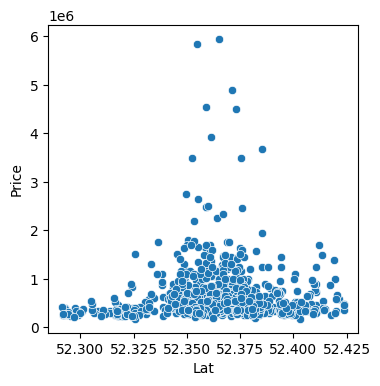

In [17]:
plt.figure(figsize=(16,4))
for col in num.columns:
    plt.figure(figsize=(4,4))
    sns.scatterplot(x=num[col], y=df['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

df_num = num.copy()
df_cat = cat.drop(['Zip', 'Address'], axis=1)

y = df['Price']
X_num = df_num
X_cat = pd.get_dummies(df_cat, columns=['outcode'], drop_first=True)
X_full = pd.concat([X_num, X_cat], axis=1)

idx_train, idx_test, y_train, y_test = train_test_split(
    X_full.index, y, test_size=0.2, random_state=42
)
num_order = ["Area", "Room", "Lon", "Lat"]

scaler = StandardScaler().fit(X_num.loc[idx_train, num_order])

X_train_num = pd.DataFrame(
    scaler.transform(X_num.loc[idx_train, num_order]),
    index=idx_train, columns=num_order
)
X_test_num = pd.DataFrame(
    scaler.transform(X_num.loc[idx_test, num_order]),
    index=idx_test, columns=num_order
)


X_train_cat = X_cat.loc[idx_train]
X_test_cat  = X_cat.loc[idx_test]

X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test  = pd.concat([X_test_num,  X_test_cat],  axis=1)



In [24]:
#use ridge to avoid collapses
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_rid = ridge_model.predict(X_test)
print("R²:", ridge_model.score(X_test, y_test))
print("Mean squared error:", mean_squared_error(y_test, y_pred_rid))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred_rid))
scores = cross_val_score(ridge_model, X, y, cv=5, scoring="r2")
print("Mean ridge R²:", np.mean(scores), "±", np.std(scores))


R²: 0.8328917766164272
Mean squared error: 50884931885.64614
Mean absolute error: 138959.9656770565
Mean ridge R²: 0.7220900478586133 ± 0.09754159531459551


In [20]:
rf_model = RandomForestRegressor(n_estimators=68, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("R²:", r2_score(y_test, y_pred_rf))
print("Mean squared error:", mean_squared_error(y_test, y_pred_rf))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred_rf))
scores = cross_val_score(rf_model, X, y, cv=5, scoring="r2")
print("Mean rf R²:", np.mean(scores), "±", np.std(scores))


R²: 0.8796336883515649
Mean squared error: 36651886098.37836
Mean absolute error: 94442.45569586531
Mean rf R²: 0.7907784723534125 ± 0.04887611691234201


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
print("Test R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
scores = cross_val_score(knn, X, y, cv=5, scoring="r2")
print("Mean rf R²:", np.mean(scores), "±", np.std(scores))

Test R²: 0.6971106392197632
MSE: 92230676504.84239
MAE: 151785.59239130435
Mean rf R²: 0.676776937595778 ± 0.07888350009178306


C:\Users\Saturn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [22]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=9, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
print("Test R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
scores = cross_val_score(dt_model, X, y, cv=5, scoring="r2")
print("Mean rf R²:", np.mean(scores), "±", np.std(scores))

Test R²: 0.6971106392197632
MSE: 92230676504.84239
MAE: 151785.59239130435
Mean rf R²: 0.5772690163152221 ± 0.09030790008457504


In [26]:
vote_reg = VotingRegressor(estimators=[("ridge", ridge_model), ("rf", rf_model)])
vote_reg.fit(X_train, y_train)
y_pred = vote_reg.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
cv_scores = cross_val_score(vote_reg, X, y, cv=5, scoring="r2")
print("CV R²:", cv_scores.mean(), "±", cv_scores.std())
with open("voting_model.pkl", "wb") as f:
    pickle.dump(vote_reg, f)

R²: 0.885906704108493
CV R²: 0.7900560511741377 ± 0.044928859419854035


In [29]:
with open("rf_model.pkl", "wb") as f: pickle.dump(rf_model, f)
with open("scaler.pkl", "wb") as f: pickle.dump(scaler, f)
with open("train_columns.pkl", "wb") as f: pickle.dump(X_train.columns.tolist(), f)
with open("num_order.pkl", "wb") as f: pickle.dump(num_order, f)


